<a href="https://colab.research.google.com/github/Yunho-seo/education_center6/blob/main/001_4_0_4%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step


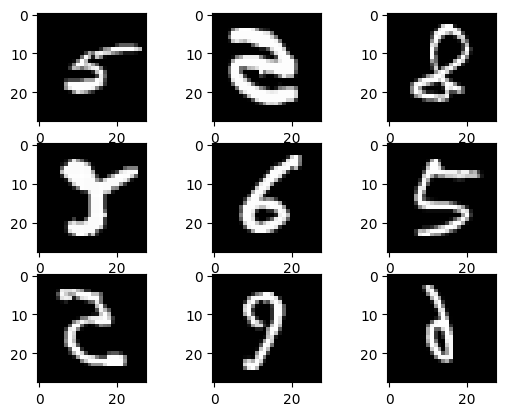

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
(X_train, y_train), (X_test, y_test) = mnist.load_data()  # 데이터셋 로드 (데이터셋은 훈련 데이터와 테스트 데이터로 구성)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # 이미지 형태 조정, (60000, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)  # (10000, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)  # 이미지를 수평으로 뒤집고 수직으로 뒤집는 기법 사용
datagen.fit(X_train)  # 데이터 증강을 적용할 이미지 데이터 형태를 설정
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size = 9):  # 배치 생성
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)  # 3x3 형태 서브플롯
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap = pyplot.get_cmap('gray'))
  pyplot.show()
  break

In [ ]:
# cifar10을 이용한 모델
# 컬러 이미지를 사용

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical  # 레이블을 원-핫 인코딩 형식으로 변환
import matplotlib.pyplot as plt

IMG_CHANNELS = 3  # 이미지의 채널 수, RGB
IMG_ROWS = 32  # 이미지의 크기 / 32x32
IMG_COLS = 32
BATCH_SIZE = 128  # 배치 사이즈 (한번에 학습되는 데이터개수)
NB_EPOCH = 20  # 에포크 실행횟수 (전체 데이터의 학습회수)
NB_CLASSES = 10  # 클래스 수 (종속변수)
VERBOSE = 1  # 훈련과정 출력 모드 (학습하면서 설명을 출력하는지의 여부)
VALIDATION_SPLIT = 0.2  # 검증 데이터의 비율 (train / validation(학습 도중 검증) / test)
OPTIM = RMSprop()  # learning rate를 처음에는 크게, 나중에는 작게 조절하는 optimizer이다.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()  # 훈련 데이터와 테스트 데이터
print('X_train shape:', X_train.shape)  # 데이터 50000개, 이미지 높이 32, 이미지 너비 32(32x32), 채널수 3(RGB 이미지)

170498071/170498071 [==============================] - 14s 0us/step
X_train shape: (50000, 32, 32, 3)


In [ ]:
# 종속변수를 범주화
Y_train = to_categorical(Y_train, NB_CLASSES)  # 레이블을 원-핫 인코딩 형식으로 변환한다.
Y_test = to_categorical(Y_test, NB_CLASSES)

# 이미지 정규화
X_train = X_train.astype('float32')  # 데이터 타입 변환
X_test = X_test.astype('float32')
X_train /= 255  # 각 픽셀의 값을 0과 1 사이로 정규화한다.
X_test /= 255
# 범주화, 정규화 실시하는 이유? 신경망 모델을 훈련하기 위해 데이터를 적절한 형태로 변환해야 한다.

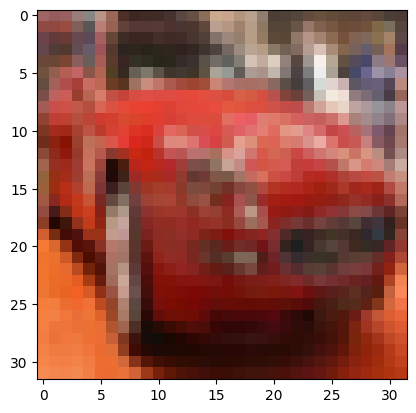

In [ ]:
plt.imshow(X_train[5])  # 5번째 이미지를 출력한다.
plt.grid(False)  # 그리드 라인 표시 X
plt.show()

In [ ]:
3 * 3 * 3 * 32 + 32  # 컬러수를 고려한다.

896

In [ ]:
model = Sequential()
# 32 * 32 * 3
# 가중치 : 3 * 3 * 3 * 32 + 32
# 픽셀수 - 필터수 + 1
# 출력차수 : 32 * 32 * 32  (same)
model.add(Conv2D(32, (3, 3), padding='same',  # 32개의 3x3 필터 사용하는 Conv layer 추가 (입력사이즈 = 출력사이즈)
                 input_shape = (IMG_ROWS, IMG_COLS, IMG_CHANNELS)))  # 입력 이미지의 크기와 채널수
model.add(Activation('relu'))  # relu 함수를 적용
model.add(MaxPooling2D(pool_size = (2, 2)))  # 16 * 16 * 32 / 2x2 크기의 Pooling filter를 적용한다.
model.add(Dropout(0.25))  # 25%의 드롭아웃 비율 (25%만 계산하지 않음 -> 과적합 방지)
model.add(Flatten())  # 8192 / 다차원 배열을 1차원으로 평탄화
model.add(Dense(512))  # 가중치 8192 * 512 + 512 => 출력 : 512 / 512개의 유닛을 가진 Dense 추가 
model.add(Activation('relu'))
model.add(Dropout(0.5))  # 50%의 드롭아웃 비율
model.add(Dense(NB_CLASSES))  # 가중치 : 512 * 10 + 10 / 클래스 수만큼의 Dense 레이어를 추가
model.add(Activation('softmax'))  # 소프트맥스 함수 적용
model.summary()  # 모델의 요약 정보를 출력한다.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               4194816   
                                                      

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = OPTIM, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE,  # 모델 훈련 / history에는 훈련 과정의 손실 값과 정확도값이 저장
                    epochs = NB_EPOCH, validation_split = VALIDATION_SPLIT, verbose = VERBOSE)

Epoch 1/20
313/313 [==============================] - 13s 8ms/step - loss: 1.8444 - accuracy: 0.3441 - val_loss: 1.4877 - val_accuracy: 0.4895
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.4562 - accuracy: 0.4827 - val_loss: 1.3797 - val_accuracy: 0.4990
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.3188 - accuracy: 0.5314 - val_loss: 1.2107 - val_accuracy: 0.5662
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 1.2206 - accuracy: 0.5681 - val_loss: 1.1496 - val_accuracy: 0.5961
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.1533 - accuracy: 0.5953 - val_loss: 1.2081 - val_accuracy: 0.5801
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0912 - accuracy: 0.6179 - val_loss: 1.1038 - val_accuracy: 0.6177
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 1.0376 - accuracy: 0.6327 - val_loss: 1.0804 - val_accuracy: 0.6204
Epoch

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = VERBOSE)
print('\nTest loss: ', score[0])  # 테스트 손실 값
print('Test Accuracy: ', score[1])  # 테스트 정확도 값

79/79 [==============================] - 0s 4ms/step - loss: 0.9928 - accuracy: 0.6792

Test loss:  0.9927836060523987
Test Accuracy:  0.6791999936103821


In [ ]:
# 웹에서 사용 : JSON 사용
model_json = model.to_json()  # 모델의 구조를 JSON 형식으로 변환한다.
open('cifar10_architecture.json', 'w').write(model_json)  # 파일 생성 후 해당 파일의 모델 구조(json 형식)를 기록 후 저장
model.save_weights('cifar10_weights.h5', overwrite = True) # 파일에 모델의 가중치를 저장
# 훈련된 모델 구조를 json 파일로 저장하고, 가중치를 h5 파일로 저장할 수 있다. => 나중에 모델 로드하여 재사용, 전이학습 수행 가능

In [ ]:
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
from keras.optimizers import SGD
model_architecture = 'cifar10_architecture.json'  # 모델 구조 파일의 경로
model_weights = 'cifar10_weights.h5'  # 모델 가중치 파일의 경로
model = model_from_json(open(model_architecture).read())  # 모델 생성
model.load_weights(model_weights)

In [ ]:
# 문제
# 이미지를 2장 로드하고 예측(predict)하기
# - 이미지 사이즈
# - 이미지 정규화

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/dogs_vs_cats-20230601T053814Z-001.zip', 'r') as zip:
  zip.extractall()  # zip파일 압축 해제
  print('done')

done


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/dogs_vs_cats/train.zip', 'r') as zip:
  zip.extractall()  # zip파일 압축 해제
  print('done')

done


In [ ]:
with ZipFile('/content/dogs_vs_cats/test.zip', 'r') as zip:
  zip.extractall()  # zip파일 압축 해제
  print('done')

done


In [ ]:
%cp /content/drive/MyDrive/dataset/train/cat.0.jpg

cp: missing destination file operand after '/content/drive/MyDrive/dataset/train/cat.0.jpg'
Try 'cp --help' for more information.


In [ ]:
%cp /content/drive/MyDrive/dataset/train/dog.0.jpg

cp: missing destination file operand after '/content/drive/MyDrive/dataset/train/dog.0.jpg'
Try 'cp --help' for more information.


In [ ]:
!pwd

/content


In [ ]:
img_names = ['/content/drive/MyDrive/dataset/train/cat.0.jpg', 
              '/content/drive/MyDrive/dataset/train/dog.0.jpg']

In [ ]:
import numpy as np
from imageio import imread
from skimage.transform import resize
imgs = [resize(imread(img_name), (32, 32)).astype('float32') for img_name in img_names]
imgs = np.array(imgs) / 255

<ipython-input-93-3eb5f44db159>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgs = [resize(imread(img_name), (32, 32)).astype('float32') for img_name in img_names]


In [ ]:
cifar10_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
                'frog', 'horse', 'ship', 'truck']
predictions = model.predict(imgs)
print(predictions)
for pred in predictions:
  print(cifar10_name[np.argmax(pred)])

1/1 [==============================] - 0s 68ms/step
[[3.2226714e-01 9.8088020e-03 3.4838310e-01 2.8273445e-01 2.3503898e-02
  1.2301663e-03 9.1267138e-04 1.0025843e-02 1.1064092e-03 2.7504284e-05]
 [3.2187134e-01 9.6126767e-03 3.4590867e-01 2.8562516e-01 2.3689581e-02
  1.2172328e-03 8.5691956e-04 1.0109135e-02 1.0823722e-03 2.6919208e-05]]
bird
bird


# pre-trained model의 사용 in keras

In [ ]:
import matplotlib.pyplot as plt
# 사전 훈련된 InceptionV3 모델
# pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3, decode_predictions
inceptionv3 = InceptionV3(input_shape = (299, 299, 3))  # Conv2D, Pooling / 입력 이미지 크기(299x299)와 채널수(3)
# 1x1, 3x3, 5x5 => 특징을 여러개 추출하여 다시 concatenate(병합)하여 학습 : Inceptionv3

96112376/96112376 [==============================] - 0s 0us/step


35363/35363 [==============================] - 0s 0us/step
테스트 시 소요시간: 11.689024686813354
flatworm (100.00%)


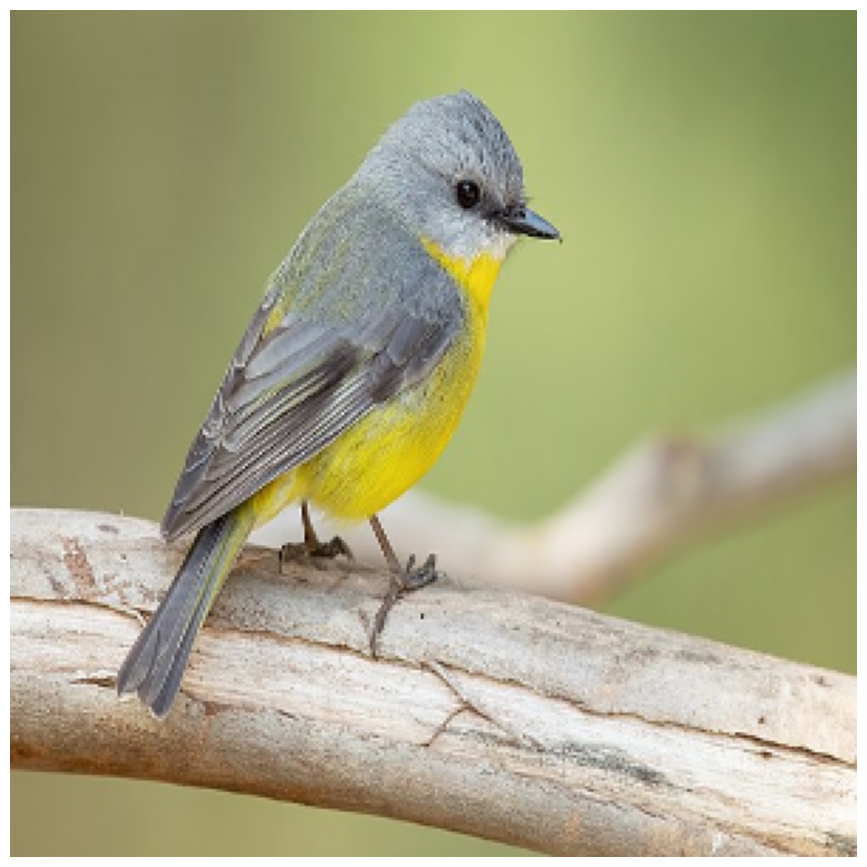

In [ ]:
import cv2  # 이미지 파일을 읽고 조작하는 기능
import time
img = cv2.imread('/content/drive/MyDrive/dataset/bird.jpg', -1)  # 이미지를 원본색상 형식으로 읽기
img = cv2.resize(img, (299, 299))  # 이미지 크기를 299x299로 조정
start = time.time()
yhat = inceptionv3.predict(img.reshape(-1, 299, 299, 3))  # 이미지를 예측(img는 4차원으로 변환됨)
time = time.time() - start  # 예측 시간을 계산
# (class_name, class_description, score)
label = decode_predictions(yhat)  # 리스트로 리턴 (이미지마다 3개의 정보를 가지고 있음) / 사전훈련된 모델의 예측 결과를 해석
label = label[0][0]  # 이미지 번호. 가장 확률이 높은 레이블 정보를 선택

print('테스트 시 소요시간: {}'.format(time))  # 테스트 시간 출력
print('%s (%.2f%%)' % (label[1], label[2]*100))  # 예측된 레이블 - 해당 레이블 확률을 출력
img = img[:, :, ::-1]  # 이미지 색상 채널 순서를 변경 (OpenCV는 BGR순서, 컴퓨터는 RGB순서)
plt.figure(figsize=(11, 11))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
tfds.disable_progress_bar()  # TFDS의 진행 상황 표시 비활성화
train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",  # 데이터셋 이름
    split = ["train[:40%]", "train[40%:50%]", "train[50%:60%]"],  # 데이터셋을 학습(전체의 40%), 검증(10%), 테스트(10%) 셋으로 분할
    as_supervised = True,  # 데이터셋을 (이미지, 레이블) 형태로 로드하도록 지정
)
print("학습훈련셋: %d" % tf.data.experimental.cardinality(train_ds))
print("검증훈련셋: %d" % tf.data.experimental.cardinality(validation_ds))
print("테스트훈련셋: %d" % tf.data.experimental.cardinality(test_ds))

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
학습훈련셋: 9305
검증훈련셋: 2326
테스트훈련셋: 2326


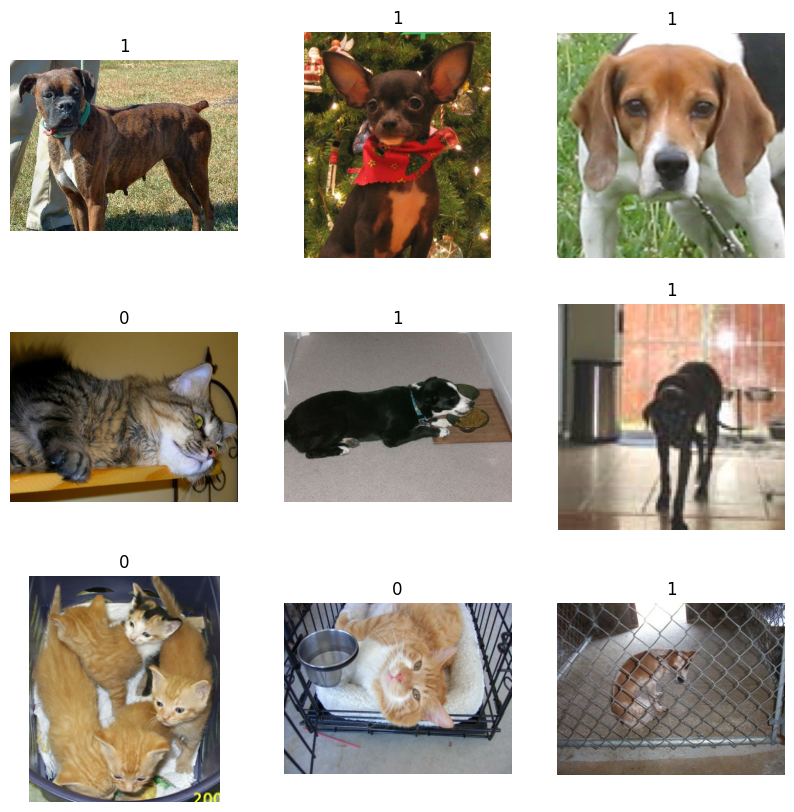

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):  # 학습 훈련셋에서, 처음부터 9개의 이미지와 레이블만 가져옴
  ax = plt.subplot(3, 3, i+1)  # 3x3 형태의 서브플롯 / i+1은 현재 서브플롯의 인덱스
  plt.imshow(image)
  plt.title(int(label))
  plt.axis('off')

In [ ]:
size = (150, 150)  # 이미지 사이즈가 중요한 역할을 함
# 각각의 데이터셋에 map()로, 이미지를 크기 size로 조정한다.
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))
# 학습, 검증, 테스트 데이터셋의 이미지들이 지정한 크기로 조정된다. (이미지 크기 일치)

In [ ]:
batch_size = 32  # 배치 사이즈 (한번에 32개의 샘플을 처리)
# cache() : 데이터를 메모리에 캐시하여 로딩속도를 향상시킨다.
# batch(batch_size) : 배치 크기에 따라 데이터셋을 나눈다.
# prefetch(buffer_size = 10) : 학습 중 데이터를 사전로딩하여 GPU와 CPU 작업을 병렬수행. (사전로딩할 데이터 10개)
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size = 10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size = 10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size = 10)

In [ ]:
# 데이터 증강
from tensorflow.keras import layers
data_augmentation = keras.Sequential(  # 데이터 증강
    [layers.RandomFlip('horizontal'), layers.RandomRotation(0.1),]  # 수평방향으로 이미지를 랜덤으로 뒤집는 데이터 증강
                                    # 이미지 무작위로 회전, 0.1은 회전 각도(라디안)의 범위
)

In [ ]:
base_model = keras.applications.Xception(
    weights = 'imagenet',  # imagenet 데이터셋으로 사전학습된 가중치 사용
    input_shape = (150, 150, 3),  # 입력 이미지의 크기 지정
    include_top = False,  # 1000개로 출력 layer 불포함. (fully connected layer 포함하지 않도록.)
)
base_model.trainable = False  # 모든 레이어는 학습하지 않도록 한다.
inputs = keras.Input(shape = (150, 150, 3))  # 입력 레이어
x = data_augmentation(inputs)  # 데이터 증강 모델을 입력하여 입력 이미지를 변형시킴
# 이미지 -1 ~ 1 사이의 정규화 (255가 아닌 127.5)
# color RGB(255, 255, 255) : 0 ~ 1 사이의 값
# 127.5로 나누면, 0 ~ 2 사이의 값인데 offset = -1 지정하여 -1 ~ 1 사이의 값
scale_layer = keras.layers.Rescaling(scale = 1 / 127.5, offset = -1)  # 입력 이미지 픽셀값을 0 ~ 1 사이로 정규화
x = scale_layer(x)  # 입력 이미지에 정규화 적용
x = base_model(x, training=False)  # 변환된 이미지 전달
# 네트워크 추가
x = keras.layers.GlobalAveragePooling2D()(x)  # 공간차원 제거 (Pooling : 사이즈를 줄여줌)
# ex) (32, 124, 124, 3)을 GlobalAveragePooling한다면? => 32 x 3
x = keras.layers.Dropout(0.2)(x)  # 드롭아웃 20%, 과적합 제거
outputs = keras.layers.Dense(1)(x)  # dogs인가? cats인가? / 최종 출력 레이어를 정의
model = keras.Model(inputs, outputs)  # 입출력을 지정하여 전체 모델을 구성한다.
model.summary()
# None은 batch_size로 대체된다.

83683744/83683744 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0      

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = [keras.metrics.BinaryAccuracy()],
)
epochs=20
model.fit(train_ds, epochs=epochs, validation_data = validation_ds)

In [ ]:
# 문제
# 테스트 데이터를 입력하여 예측하고, loss와 accuracy를 출력
# loss와 accuracy 시각화

In [ ]:
score = model.evaluate(test_ds, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation / Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth = 2.0, marker = '+', markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = '4', markersize = 10.0)
plt.grid(True)
plt.show()

# EfficientNet

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
batch_size = 48
width = 150
height = 150
epochs = 20
NUM_TRAIN = 2000
NUM_TEST = 1000
dropout_rate = 0.2
input_shape = (height, width, 3)

In [ ]:
import os
if not os.path.isdir('efficientnet_keras_transfer_learning'):
  !git clone https://github.com/Tony607/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content/efficientnet_keras_transfer_learning


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0 as Net
from tensorflow.keras.layers import CenterCrop
from tensorflow.keras.applications.efficientnet import preprocess_input
conv_base = Net(weights = 'imagenet', include_top = False, input_shape = input_shape)

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/dataset/catsanddogs.zip', 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
%cd /content

/content


In [ ]:
original_dataset_dir = 'PetImages'
cat_images = glob.glob(os.path.join(original_dataset_dir, "Cat", '*.jpg'))
dog_images = glob.glob(os.path.join(original_dataset_dir, "Dog", '*.jpg'))
print('total cat images: {}\n\rtotal dog images: {}'.format(len(cat_images),
                                                            len(dog_images)))

total cat images: 12500
total dog images: 12500


# 디렉터리 구조
- train/validation/test
- flow_from_directory : 디렉터리로부터 이미지를 로딩
- 이미지 데이터가 많으면, 메모리 부하

In [ ]:
base_dir = './data/dog_vs_cat_small'
os.makedirs(base_dir, exist_ok = True)
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok = True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok = True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok = True)
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok = True)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok = True)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok = True)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok = True)
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok = True)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok = True)

In [ ]:
# 데이터 분할
fnames = cat_images[:NUM_TRAIN // 2]
for fname in fnames:
  dst = os.path.join(train_cats_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)  # 복사
offset = NUM_TRAIN // 2
fnames = cat_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
  dst = os.path.join(validation_cats_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)
offset = offset + NUM_TEST // 2
# validation data == test data
fnames = cat_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
  dst = os.path.join(test_cats_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)
fnames = dog_images[:NUM_TRAIN // 2]
for fname in fnames:
  dst = os.path.join(train_dogs_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)
offset = NUM_TRAIN // 2
fnames = dog_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
  dst = os.path.join(validation_dogs_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)
offset = offset + NUM_TEST // 2
fnames = dog_images[offset:offset + NUM_TEST // 2]
for fname in fnames:
  dst = os.path.join(test_dogs_dir, os.path.basename(fname))
  shutil.copyfile(fname, dst)

In [ ]:
# ImageDataGenerator : 데이터 augmentation (증감)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,  # 정규화
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,  # 전단
    zoom_range = 0.2,   # 일부 확대
    horizontal_flip = True,
    fill_mode = 'nearest')  # 빈 경우가 발생하면, 가장 가까운 색상으로 채운다.
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (height, width),  # 로딩하면서 resize : 모델이 입력될 때에는 사이즈가 같아야 함
    batch_size = batch_size,  # 배치 사이즈만큼 로딩
    class_mode = 'categorical')  # 종속변수는 범주화해야 한다.
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (height, width),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name = 'gap'))
if dropout_rate > 0:
  model.add(layers.Dropout(dropout_rate, name='dropout_out'))
model.add(layers.Dense(2, activation='softmax', name='fc_out'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 5, 5, 1280)       4049571   
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
conv_base.trainable = False  # application

In [ ]:
!pwd

/content


In [ ]:
%cd /content

/content


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate = 2e-5),
              metrics=['acc'])
history = model.fit_generator(
    train_generator,  # 32 batch size
    steps_per_epoch = NUM_TRAIN // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = NUM_TEST // batch_size,
    verbose = 1,  # 설명을 출력
    use_multiprocessing = True,
    workers = 4  # 병렬 처리
)

In [ ]:
os.makedirs('./models', exist_ok = True)
model.save('./content/drive/MyDrive/dataset/catsanddogs/cats_and_dogs')

In [ ]:
os.makedirs('./models', exist_ok = True)
model.save('./moels/cats_and_dogs_small.h5')

In [ ]:
# 가중치만 저장한다.
os.makedirs('./models', exist_ok = True)
model.save_weights('./checkpoints/my_checkpoint')

In [ ]:
model.load_weights('./checkpoints/my_checkpoint')

In [ ]:
import tensorflow as tf
tf.__version__